<a href="https://colab.research.google.com/github/placeasmedia/infosci102/blob/master/Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/support_vector_machine/svm.ipynb)


1.	Data Exploration (Unsupervised methods)

*  Unsupervised methods: word cloud, topic modeling, and so on
*  Unsupervised methods are helpful in data exploration, description, or visualization. They are useful when we knew little about the data but nonetheless need to tell a story about it. They are useful in data journalism.
*  But they can be problematic in revealing false pattern or making misleading statement. For example, a topic modeling of twitter feeds may give us very different patterns over Super Bowl compared to an event such as political election.

 
2.	Supervised methods 
* Supervised methods: character comparison, n-gram, and support vector machine, and so on
* Supervised methods are helpful in identifying theory-driven content in texts, including most studies in history, literature, political science, sociology, and economics. 
* Because supervision of the texts differs, these methods also differ case by case.



# Text Clustering

## What will we do?

We will build a topic model, specifically LDA (Latent Dirichlet Allocation) that will find multiple classes related to the text.

# What are some use cases for LDA

It can be used for clustering, dimension reduction, tagging, etc.

# What is LDA

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

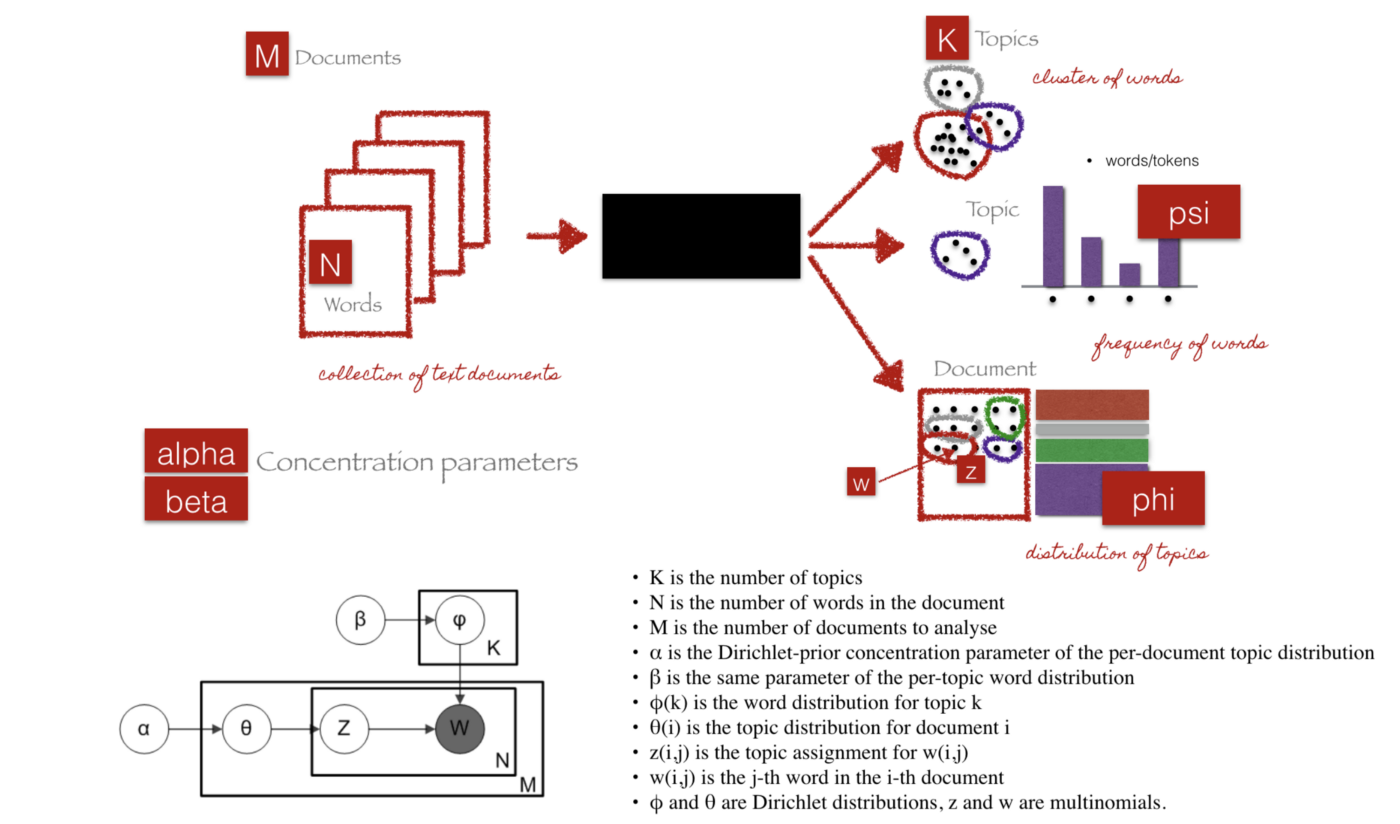

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

* psi, the distribution of words for each topic K

* phi, the distribution of topics for each document i

In [ ]:
!pip install sklearn

## Data: The 20 Newsgroups data set

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. Let us load it into Google Colab.

In [28]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups


# parrameters of LDA
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))


## Take a look at the data
for n in data_samples:
  print(n)



Loading dataset...
done in 1.377s.
<class 'list'>
<class 'str'>


In order to feed predictive or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis. This can be achieved with the utilities of the sklearn.

In [ ]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf features for LDA...
done in 0.051s.



Here we are learning thee vocabulaary dictionary aand it returns a Document-Term matrix.

**TF**: Just counting the number of words in each document has 1 issue: it will give more weightage to longer documents than shorter documents. 

To avoid this, we can use frequency (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document. We will use this technique in the next example.

Now fit the vector of data into the model.

In [ ]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=200 and n_features=1000...
done in 0.404s.

Topics in LDA model:
Topic #0: insurance know good drive car does don riding bike cable city hard people times just jesus life doesn did having
Topic #1: try current problem sense range keyboard hand thought university suspension fax attack au chip unless edu key remember school email
Topic #2: win like way really better year don contact going think piece vram know moon info season leafs effect team need
Topic #3: think don like just good people power use time coming right president ll work law political using know new fast
Topic #4: program drive errors hard read cache went keyboard power gs monitor windows time files file new help sectors just error
Topic #5: edu graphics mail send 128 3d com file format objects image available files package software tar stuff message help data
Topic #6: just captain traded use new hp blood believe rules going bob using years government flyers port ve paul assu

## Practice 

Practice this method by changing the numbers in the parameters. See what differences the parameters can make in shaping the topics in the end. 

# Text Classification


## What will we do?

We will build a Support Vector Machine that will find the optimal hyperplane that maximizes the margin between two data classes using gradient descent.  

## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc) , outlier detection, etc.


## How does an SVM compare to other ML algorithms?

![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers. 
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use depends on your dataset and the general complexity of the problem.
- "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)  


## What is a Support Vector Machine?

It's a supervised machine learning algorithm which can be used for both classification or regression problems. But it's usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorized based on on which side of the gap they fall.

## What are Support Vectors?

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")
 
Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM. 

## Whats a hyperplane?

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.







## Again, let us load thee data set



In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

Note: Above, we are only loading the training data. We will load the test data separately later in the example.

You can check the target names (categories) and some data files by following commands.

In [ ]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:10])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


## Extracting features from text files.
Text files are actually series of words (ordered). In order to run machine learning algorithms we need to convert the text files into numerical feature vectors. We will be using bag of words model for our example. Briefly, we segment each text file into words (for English splitting by space), and count # of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

Scikit-learn has a high level component which will create feature vectors for us ‘CountVectorizer’.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

Here by doing ‘count_vect.fit_transform(twenty_train.data)’, we are learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features].

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)),])

_ = text_clf_svm.fit(twenty_train.data, twenty_train.target)


twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.8240839086563994

# Data: Tweets in March 2015

Now we are ready to work on some real-world data. You will be using a proportion of Tweets on a day in March 2015. Explore the top 10 most common topics on that day.

In [3]:
## download the file to your Google Colab
!wget https://www.dropbox.com/s/7khledq8zt1nqk5/twitter_2015.csv

--2020-09-22 10:56:22--  https://www.dropbox.com/s/7khledq8zt1nqk5/twitter_2015.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7khledq8zt1nqk5/twitter_2015.csv [following]
--2020-09-22 10:56:22--  https://www.dropbox.com/s/raw/7khledq8zt1nqk5/twitter_2015.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca0b42c1be03355a6d455f16fda.dl.dropboxusercontent.com/cd/0/inline/A_2jBRAvbpY8YMYa4BrhjAB6r_befVvY_O_JOu8ZHv4HZHLciHI6f7_QvHI3YlVvucRUb7GxsZn04RcanlXIgvKKBZufqls_8nzr6HDU1h0hCLTRqI3UL0YrdqOQQVvn1SY/file# [following]
--2020-09-22 10:56:23--  https://uca0b42c1be03355a6d455f16fda.dl.dropboxusercontent.com/cd/0/inline/A_2jBRAvbpY8YMYa4BrhjAB6r_befVvY_O_JOu8ZHv4HZHLciHI6f7_QvHI3YlVvucRUb7GxsZn04RcanlXIgvKKBZufqls_8nz

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups


twitter = pd.read_csv("twitter_2015.csv")

# re-format data
data = twitter['text'].astype(str).values.tolist()


# parrameters of LDA
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data)
print()


print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf features for LDA...

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...

Topics in LDA model:
Topic #0: http gt lol night man like hate music photo getting big help amazing fucking hot lot hair white guy sure
Topic #1: rt amp want make great thanks look tonight hope read tweet beautiful ur thank does harry_styles mind nigga pls justin
Topic #2: really ve say real god oh jalenmcmillan gonna nice said yes care thing true friend ya mom yeah ain ass
Topic #3: just people need free did win little baby makes old mean song money remember actually okay watching boys thought fans
Topic #4: http don like know update weather im think things thank use 11 try 20 cause ok cool 18 12 lt
Topic #5: today kca good right shit girl stats girls vote5sos heart hey friends unfollowers looking tell votefifthharmony followers damn pretty start
Topic #6: http new happy video best 10 come twitter fuck birthday person week work home morning youtube followers wish cute didn
To

## Exercise 1

Try different combinations of parameters. Print out top 5 topics that make the most sense. Copy the results in the output and add your label to each topic.

For example:

Topic #6: 1 57 6 9945 ....      (label: numbers)

## Categorize some tweet first

Now let us come from the opposite direction. Suppose we are interested in politics and policy in general regarding to the opinions of Twitter users. 

* We define two category of tweets: political vs. nonpolitical

* We then label a small sample of tweets into these category

* We use the labeled sample to train the model and predict the remaining tweets

* We validate the results

## Step 1

Label a small sample of tweets and choose some tweets to be labeled.

In [8]:
# change n for a different sample size
# change random_state for a different random sample
twitter.sample(n=10, random_state=1)

,text
34944,RT @kittischnitti: Tuddelino got a new fwwiend...
35176,RT @Grimezsz: Also me and @jackantonoff made a...
99751,A girl just complimented me on my freckles lol
40283,G coolin http://t.co/emlT8W9BHE
46617,Squad (3/4) https://t.co/QOofWO6XYH
79898,RT @BuddhaBoySamuel: Keep your heads up fellas...
22224,RT @leahnathann: “@fshknn: who the hell did th...
70046,https://t.co/TFDEYsVvtv\nagain and again... ht...
7376,Door Shop Assembler http://t.co/HQoBZMKUk7 #US...
49437,"Baby, every time i love You💕"


# Step 2 Prepare the labeled tweets

Define the two categories: political vs. nonpolitical. Then we prepare the two categories with some hand-labeled tweets.

In [51]:
import numpy as np
import pandas as pd

## hand labelled political tweets
political = ["The Obama administration doesn't trust Hillary http://t.co/Z0OXUiiYjj via @DCExaminer",
"any #Teen #Republicans want to help me storm heaven and overthrow god? hit me up #online",
"Who is really buying elections? #Soros, #KochBros #unions #BillGates #FORD #TEAPArty #OWS #Republican #Democrat #SGP https://t.co/sRmXTmYJLI",
"RT @ImmigranNacion: @RodneyDavis #Obama makes your work,is time to #Republican congress, take #ActOn #ImmigrationReform #PassCIR #AINF http…",
"This picture of George bush is made from all 670 soldiers killed in the Iraq War. #GOPWantsWar http://t.co/X500pDnMJJ",
"@bevschafer Do these young people think its 'cool' to protest about everything?Go take a bath &amp; get a job,hippies! #RhodesStatueProtest",
"RT @MichelleDiana: Families Launch US Protest Over 43 Missing Mexican Students http://t.co/RVwBqC6D3O"]

## hand labelled non-political tweets
nonpolitical = ["Faaack i need to go",
"#IndvsZim: India win by 6 wickets.",
"I love you so so so much.",
"It's fun to connect with the former players, Riley says. I told them a place is really just an accumulation of its h…",
"A spoonful of sugar helps the medicine go down. Unless that medicine is metformin, in which case, pass on the sugar.",
"COOOOOOME ON CHELSEA !!",
"all i want in life is to lose weight and gain money yet instead, here i am, gaining weight and losing money"]



In [60]:
## organize the data
arr1 = pd.DataFrame(political)
arr1['label'] = 'political'
arr2 = pd.DataFrame(nonpolitical)
arr2['label'] = 'nonpolitical'
df = pd.concat([arr1, arr2])
df.columns = ['tweet', 'label']
df

,tweet,label
0,The Obama administration doesn't trust Hillary...,political
1,any #Teen #Republicans want to help me storm h...,political
2,"Who is really buying elections? #Soros, #KochB...",political
3,RT @ImmigranNacion: @RodneyDavis #Obama makes ...,political
4,This picture of George bush is made from all 6...,political
5,@bevschafer Do these young people think its 'c...,political
6,RT @MichelleDiana: Families Launch US Protest ...,political
0,Faaack i need to go,nonpolitical
1,#IndvsZim: India win by 6 wickets.,nonpolitical
2,I love you so so so much.,nonpolitical


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['label'], random_state = 0)

# count words into word vectors
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# transform the word count into word frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# train the machine learning model
clf = LinearSVC().fit(X_train_tfidf, y_train)

Now predict some samples of tweets from the previous section. 

In [75]:
# this is a non-political tweet. The machine learning model correctly guessed it
print(clf.predict(count_vect.transform(["A girl just complimented me on my freckles lol"])))

['nonpolitical']


In [74]:
# this is a political tweet. The machine learning model guessed it too.
print(clf.predict(count_vect.transform(["Osama bin Laden is photographed with Hillary "])))

['political']


In [73]:
# this is a political tweet. But the machine learning model couldn't guess it because it is using a batch of tweets in 2015 as the input.

print(clf.predict(count_vect.transform(["Trump is awesome! Make America Great Again"])))

['nonpolitical']


## Exercise

Can you find a way to make the machine learning model guess all three tweets above correctly? Complete the following code by making the model correctly predict all three tweets.

In [ ]:
## Complete the code

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


## hand labelled political tweets
political = ["The Obama administration doesn't trust Hillary http://t.co/Z0OXUiiYjj via @DCExaminer",
"any #Teen #Republicans want to help me storm heaven and overthrow god? hit me up #online",
"Who is really buying elections? #Soros, #KochBros #unions #BillGates #FORD #TEAPArty #OWS #Republican #Democrat #SGP https://t.co/sRmXTmYJLI",
"RT @ImmigranNacion: @RodneyDavis #Obama makes your work,is time to #Republican congress, take #ActOn #ImmigrationReform #PassCIR #AINF http…",
"This picture of George bush is made from all 670 soldiers killed in the Iraq War. #GOPWantsWar http://t.co/X500pDnMJJ",
"@bevschafer Do these young people think its 'cool' to protest about everything?Go take a bath &amp; get a job,hippies! #RhodesStatueProtest",
"RT @MichelleDiana: Families Launch US Protest Over 43 Missing Mexican Students http://t.co/RVwBqC6D3O"]

## hand labelled non-political tweets
nonpolitical = ["Faaack i need to go",
"#IndvsZim: India win by 6 wickets.",
"I love you so so so much.",
"It's fun to connect with the former players, Riley says. I told them a place is really just an accumulation of its h…",
"A spoonful of sugar helps the medicine go down. Unless that medicine is metformin, in which case, pass on the sugar.",
"COOOOOOME ON CHELSEA !!",
"all i want in life is to lose weight and gain money yet instead, here i am, gaining weight and losing money"]

## organize the data
arr1 = pd.DataFrame(political)
arr1['label'] = 'political'
arr2 = pd.DataFrame(nonpolitical)
arr2['label'] = 'nonpolitical'
df = pd.concat([arr1, arr2])
df.columns = ['tweet', 'label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['label'], random_state = 0)

# count words into word vectors
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# transform the word count into word frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# train the machine learning model
clf = LinearSVC().fit(X_train_tfidf, y_train)

# this is a non-political tweet. The machine learning model correctly guessed it
print(clf.predict(count_vect.transform(["A girl just complimented me on my freckles lol"])))

# this is a political tweet. The machine learning model guessed it too.
print(clf.predict(count_vect.transform(["Osama bin Laden is photographed with Hillary "])))

# this is a political tweet. But the machine learning model couldn't guess it because it is using a batch of tweets in 2015 as the input.
print(clf.predict(count_vect.transform(["Trump is awesome! Make America Great Again"])))

## Additional Challenge (Optional)

We read about political polarization in our class. What if you also want to know whether the tweet leans Republican or Democrats? Revise your machine learning model so that it can predict 

1. Nonpolitical


2. Political
    * Democrat-leaning
    * Republican-leaning